# SVM - Forest Fire Data

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Feature engineering Libraries
from sklearn.preprocessing  import MinMaxScaler
from sklearn.model_selection import train_test_split

# Model Building Libraries
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

#import WARNING
import warnings
warnings.filterwarnings('ignore')

### Lodaing Data

In [2]:
forestfire = pd.read_csv('forestfires.csv')

df = forestfire.copy()
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
#shape
df.shape

(517, 31)

In [5]:
#checking null values
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

No null values found

In [6]:
#describe 
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Duplicates

In [7]:
df.duplicated().sum()

8

In [8]:
#droping duplicates
df = df.drop_duplicates()

In [9]:
df.shape

(509, 31)

In [10]:
df_num_data = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]

In [11]:
#correlation
df_num_data.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382925,0.331956,0.531926,0.431744,-0.306262,-0.030409,0.052280,0.040998
DMC,0.382925,1.000000,0.681446,0.309459,0.470875,0.062772,-0.104563,0.071017,0.076932
DC,0.331956,0.681446,1.000000,0.229757,0.496608,-0.047971,-0.202856,0.033772,0.051542
ISI,0.531926,0.309459,0.229757,1.000000,0.395858,-0.135955,0.104834,0.062132,0.008429
temp,0.431744,0.470875,0.496608,0.395858,1.000000,-0.532503,-0.227754,0.067911,0.099173
RH,-0.306262,0.062772,-0.047971,-0.135955,-0.532503,1.000000,0.070721,0.094343,-0.074554
wind,-0.030409,-0.104563,-0.202856,0.104834,-0.227754,0.070721,1.000000,0.059332,0.012623
rain,0.052280,0.071017,0.033772,0.062132,0.067911,0.094343,0.059332,1.000000,-0.006511
area,0.040998,0.076932,0.051542,0.008429,0.099173,-0.074554,0.012623,-0.006511,1.000000


In [12]:
size_dummy = pd.get_dummies(df['size_category'], drop_first=True)

In [13]:
size_dummy

,small
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [14]:
#concat size_dummy and df
df1 = pd.concat([df,size_dummy],axis=1)

df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


#### Heatmap

<AxesSubplot:>

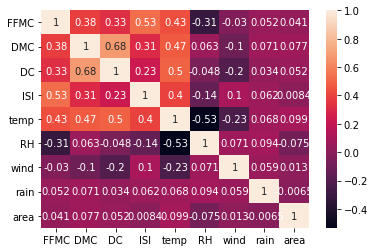

In [15]:
sns.heatmap(df_num_data.corr(), annot=True)

### EDA

In [16]:
df1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category', 'small'],
      dtype='object')

#### Plots

<AxesSubplot:xlabel='month', ylabel='count'>

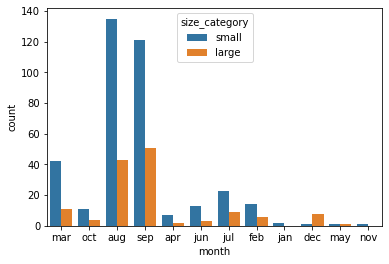

In [17]:
sns.countplot(df1['month'],hue=df1['size_category'])

<AxesSubplot:xlabel='day', ylabel='count'>

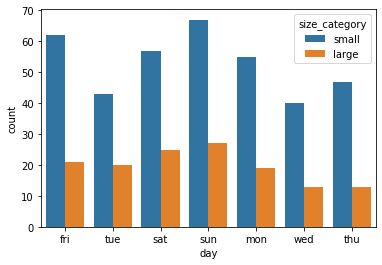

In [18]:
sns.countplot(df1['day'],hue=df1['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='count'>

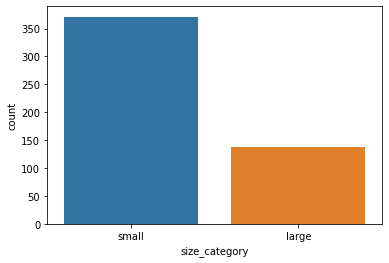

In [19]:
sns.countplot(df1['size_category'])

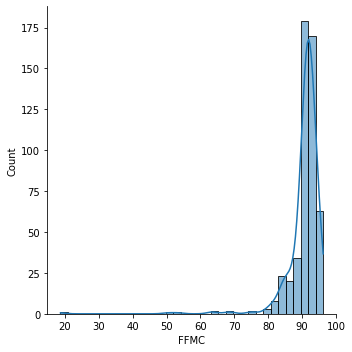

In [20]:
sns.displot(df['FFMC'],kde=True, bins=35)

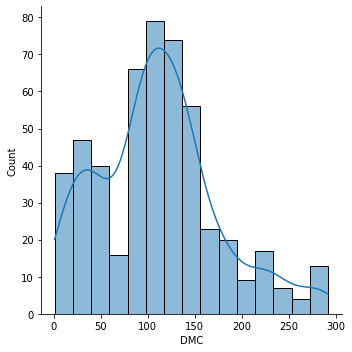

In [21]:
sns.displot(df['DMC'],kde=True)

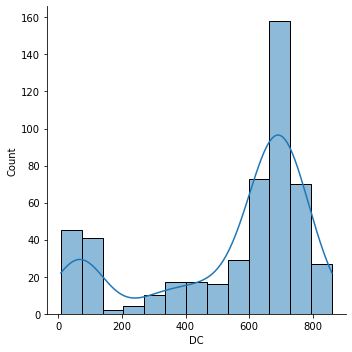

In [22]:
sns.displot(df['DC'],kde=True)

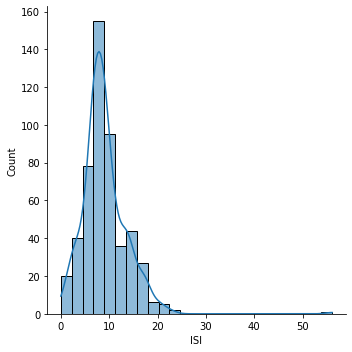

In [23]:
sns.displot(df['ISI'],kde=True, bins=25)

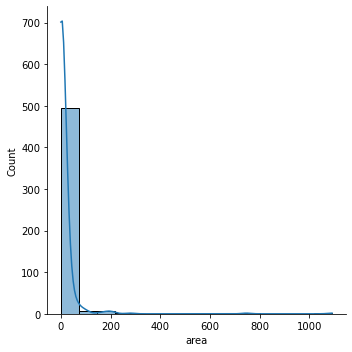

In [24]:
sns.displot(df['area'],kde=True, bins=15)

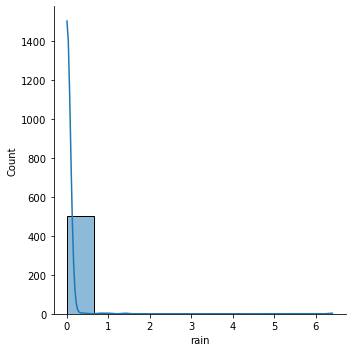

In [25]:
sns.displot(df['rain'],kde=True)

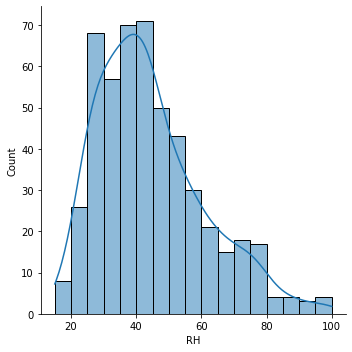

In [26]:
sns.displot(df['RH'],kde=True)

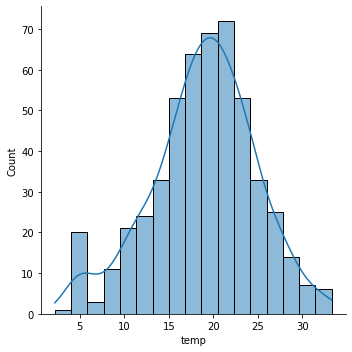

In [27]:
sns.displot(df['temp'],kde=True)

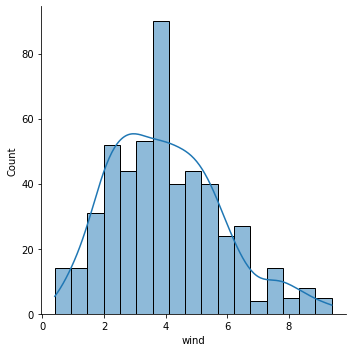

In [28]:
sns.displot(df['wind'],kde=True)

#### pairplot

In [29]:
df1.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category', 'small'],
      dtype='object')

In [30]:
pp_df1 = pd.concat([df_num_data, df1], axis=1)

In [31]:
df1.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,1,0,small,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,1,0,0,0,0,small,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,1,0,0,0,0,small,1


In [32]:
pp_df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,small
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,mar,...,0,0,0,1,0,0,0,0,small,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,oct,...,0,0,0,0,0,0,1,0,small,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,oct,...,0,0,0,0,0,0,1,0,small,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,mar,...,0,0,0,1,0,0,0,0,small,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,mar,...,0,0,0,1,0,0,0,0,small,1


<AxesSubplot:xlabel='small', ylabel='wind'>

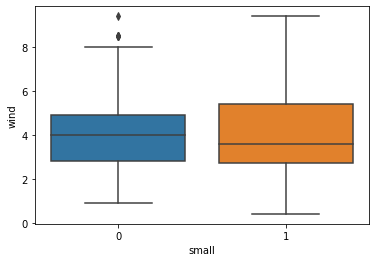

In [33]:
sns.boxplot(df1['small'],df1['wind'])

<AxesSubplot:xlabel='small', ylabel='RH'>

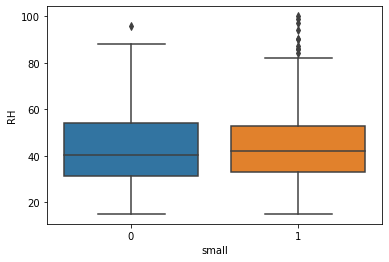

In [34]:
sns.boxplot(df1['small'],df1['RH'])

<AxesSubplot:xlabel='small', ylabel='FFMC'>

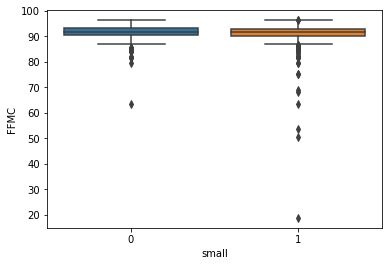

In [35]:
sns.boxplot(df1['small'],df1['FFMC'])

<AxesSubplot:xlabel='small', ylabel='DMC'>

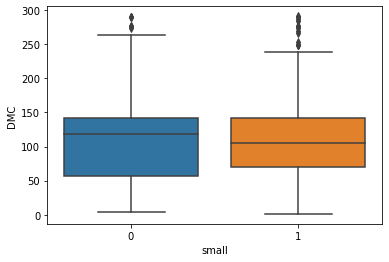

In [36]:
sns.boxplot(df1['small'],df1['DMC'])

<AxesSubplot:xlabel='small', ylabel='DC'>

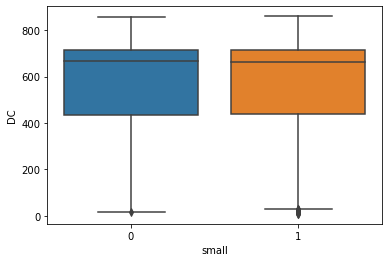

In [37]:
sns.boxplot(df1['small'],df1['DC'])

<AxesSubplot:xlabel='small', ylabel='ISI'>

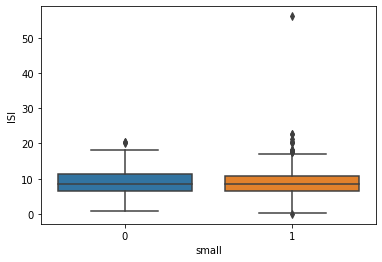

In [38]:
sns.boxplot(df1['small'],df1['ISI'])

<AxesSubplot:xlabel='small', ylabel='temp'>

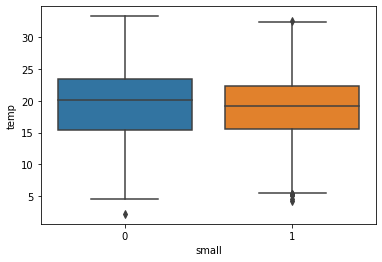

In [39]:
sns.boxplot(df1['small'],df1['temp'])

<AxesSubplot:xlabel='small', ylabel='area'>

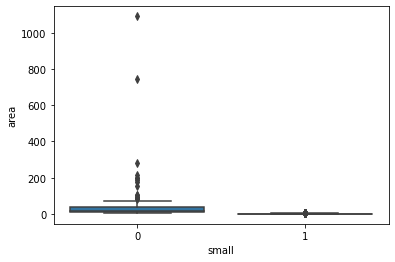

In [40]:
sns.boxplot(df1['small'],df1['area'])

<AxesSubplot:xlabel='small', ylabel='rain'>

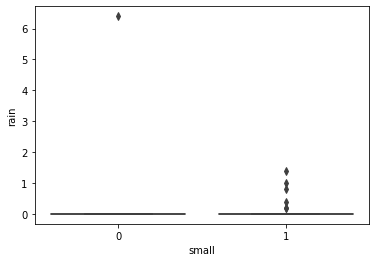

In [41]:
sns.boxplot(df1['small'],df1['rain'])

#### Spliting

In [42]:
df1.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category,small
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,1,0,0,0,0,small,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,1,0,small,1


In [43]:
X = df1.drop(['month','day','size_category', 'small'],axis=1)
y= df1['small']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [45]:
#minmax
scalar = MinMaxScaler()
scalar.fit(X_train)


MinMaxScaler()

In [46]:
scaled_X_train = scalar.transform(X_train)

In [47]:
scaled_X_test = scalar.transform(X_test)

In [48]:
#Converting Numpy arrays into DataFrame
scaled_X_train = pd.DataFrame(scaled_X_train,columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test,columns=X_test.columns)

In [49]:
scaled_X_train.shape, scaled_X_test.shape, y_train.shape, y_test.shape

((407, 28), (102, 28), (407,), (102,))

### GridSearch CV

#### using RDF kernel

In [50]:
rdf_clf= SVC()
rdf_param_grid= {'kernel': ['rbf', 'poly', 'linear'], 'gamma': [50, 10, 6, 5, 4, 0.5], 'degree': [2,3,4], 'C': [15,14,13,12,11,10,1,0.1,0.01,0.001]}
rdf_gsv= GridSearchCV(rdf_clf, param_grid=rdf_param_grid, cv=10)
rdf_gsv.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [15, 14, 13, 12, 11, 10, 1, 0.1, 0.01, 0.001],
                         'degree': [2, 3, 4], 'gamma': [50, 10, 6, 5, 4, 0.5],
                         'kernel': ['rbf', 'poly', 'linear']})

In [51]:
#printing the best scores of GSV
rdf_gsv.best_params_, rdf_gsv.best_score_

({'C': 15, 'degree': 3, 'gamma': 5, 'kernel': 'poly'}, 0.86)

#### Using Poly Kernel

In [52]:
# modeling with best parameters
poly_clf= SVC(kernel='poly', C= 10, degree=2, gamma=10)
poly_clf.fit(scaled_X_train, y_train)

y_pred= poly_clf.predict(scaled_X_test)
acc= accuracy_score(y_test, y_pred)
print('Accuracy :', acc)
confusion_matrix(y_test, y_pred)

Accuracy : 0.8333333333333334


array([[23,  8],
       [ 9, 62]], dtype=int64)